<a href="https://colab.research.google.com/github/deetee67/deetee67/blob/main/Python_proj3_DMcKinney_NYPD_arrest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NYPD Dataset - Python Project 3 DMcKinney**:

# Research Question

**Identify significant trends/ patterns of arrests and the demographic groups impacted. This was done in terms of following:**
- Communities/ Locations - Boroughs and Arresting Precincts
- Demographics - Gender, Age group 
- Type of arrests - KY code (e.g. murder, assault)
- Jurisdictions -'how' - Patrol, In Transit, Residence etc. 

 - *I wanted to identify any existing patterns particularly with respect to young persons less than 18 years being arrested as this could help in creating interventions in those communities to reduce/ prevent repeat offenses which would ultimately reduce or slow the growth of arrest in the 'older' mean age group.*


# **Step 1. **
- Importing libraries

- Load dataset -  reading csv file
Assigning dataframe

In [ ]:
import pandas as pd
import re
import numpy as np
from statistics import mode
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import matplotlib.pyplot as plot
plot.style.use('classic')
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', -1)

In [ ]:
df = pd.read_csv ('/content/sample_data/NYPD_Arrest_Data__Year_to_Date_.csv')

# **Step 2. **
Examining/ Exploring the dataset
- Dataset contais NYPD Historic Arrest data
 - Checking Shape of dataset - 115,299 rows and 19 columns
  - Checking data types
 - Checking for missing values - some seen in LAW_CD column and a few other columns

In [ ]:
df.shape

(115299, 19)

In [ ]:
df.head(2)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,9/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,9/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)


In [ ]:
df.tail(2)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
115297,222728174,1/7/2021,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,114,0,25-44,M,WHITE HISPANIC,1007694,219657,40.769561,-73.915363,POINT (-73.91536344699995 40.76956124200007)
115298,222535613,1/3/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 265031B,F,K,67,0,25-44,M,BLACK,1000054,173952,40.644129,-73.943053,POINT (-73.94305278599995 40.64412879400004)


In [ ]:
#Shows the list/count of unique values for each column/ variable in the dataset
df.nunique(axis=0)

ARREST_KEY                  115299
ARREST_DATE                    273
PD_CD                          252
PD_DESC                        233
KY_CD                           66
OFNS_DESC                       63
LAW_CODE                       922
LAW_CAT_CD                       4
ARREST_BORO                      5
ARREST_PRECINCT                 77
JURISDICTION_CODE               25
AGE_GROUP                        5
PERP_SEX                         2
PERP_RACE                        7
X_COORD_CD                   23851
Y_COORD_CD                   25306
Latitude                     28820
Longitude                    28823
New Georeferenced Column     28859
dtype: int64

In [ ]:
#List data type of each variable/ column in original dataset
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [ ]:
# Identifying missing values in dataset
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                         21
PD_DESC                       61
KY_CD                         61
OFNS_DESC                     61
LAW_CODE                       0
LAW_CAT_CD                  1078
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

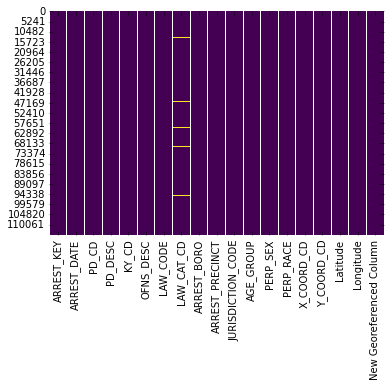

In [ ]:
#Showing a heat map of missing values - shows exactly where missing values are in dataset
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [ ]:
# df.info shows column names, col# or index, datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115299 entries, 0 to 115298
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                115299 non-null  int64  
 1   ARREST_DATE               115299 non-null  object 
 2   PD_CD                     115278 non-null  float64
 3   PD_DESC                   115238 non-null  object 
 4   KY_CD                     115238 non-null  float64
 5   OFNS_DESC                 115238 non-null  object 
 6   LAW_CODE                  115299 non-null  object 
 7   LAW_CAT_CD                114221 non-null  object 
 8   ARREST_BORO               115299 non-null  object 
 9   ARREST_PRECINCT           115299 non-null  int64  
 10  JURISDICTION_CODE         115299 non-null  int64  
 11  AGE_GROUP                 115299 non-null  object 
 12  PERP_SEX                  115299 non-null  object 
 13  PERP_RACE                 115299 non-null  o

# **Step 3. **

- **Cleaning Data**
 - e.g. dropping rows with missing values
- **Transforming Data**
  - Indexing
  - Formatting
  - Renaming columns/ variables
  - Organizing
  - Converting datatypes e.g. Arrest Date

In [ ]:
#Set column ARREST_KEY as index inplace - changing the shape of the dataframe by 1 column
df.set_index('ARREST_KEY', inplace=True)

In [ ]:
#Shows 18 columns now instead of 19 (ARREST_KEY  is now the index) 
df.shape

(115299, 18)

In [ ]:
#Shows ARREST_KEY as index
df.sample(3)

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_KEY,,,,,,,,,,,,,,,,,,
230862799,7/15/2021,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601503,F,K,75,0,<18,M,BLACK,1014309,183596,40.670563,-73.891643,POINT (-73.89164290099995 40.670562535000045)
224590755,2/19/2021,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,F,K,73,0,25-44,F,BLACK,1009794,179276,40.658719,-73.907935,POINT (-73.90793520499993 40.658719276000056)
225149629,3/5/2021,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,S,122,0,25-44,F,WHITE,962049,156598,40.596482,-74.079944,POINT (-74.07994417699997 40.59648195900007)


In [ ]:
#Transforming column ARREST_BORO values from single letter code to full string Borough name
df['ARREST_BORO'].replace(["B","S","Q", "K", "M"], ["Bronx","Staten Island","Queens", "Brooklyn", "Manhattan"], inplace = True)
df['PERP_SEX'].replace(["M","F"], [1,2], inplace = True)
df['AGE_GROUP'].replace(["<18", "18-24", "25-44", "45-64", "65+"], [1,2,3,4,5], inplace = True)

In [ ]:
#Data conversion - converting column ARREST_DATE datatype object to date
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
#Renaming columns
df.rename(columns = {'ARREST_BORO':'BOROUGH', 'PERP_SEX':'GENDER', 'ARREST_DATE':'DATE_OF_ARREST'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115299 entries, 234233843 to 222535613
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   DATE_OF_ARREST            115299 non-null  datetime64[ns]
 1   PD_CD                     115278 non-null  float64       
 2   PD_DESC                   115238 non-null  object        
 3   KY_CD                     115238 non-null  float64       
 4   OFNS_DESC                 115238 non-null  object        
 5   LAW_CODE                  115299 non-null  object        
 6   LAW_CAT_CD                114221 non-null  object        
 7   BOROUGH                   115299 non-null  object        
 8   ARREST_PRECINCT           115299 non-null  int64         
 9   JURISDICTION_CODE         115299 non-null  int64         
 10  AGE_GROUP                 115299 non-null  int64         
 11  GENDER                    115299 non-null  int64      

In [ ]:
# Remove some contiguous columns
df.drop(df.iloc[:, 12:18], inplace = True, axis = 1)
df.head(2)

,DATE_OF_ARREST,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,BOROUGH,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,GENDER
ARREST_KEY,,,,,,,,,,,,
234233843,2021-09-29,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Bronx,42,0,3,1
234129823,2021-09-27,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Brooklyn,77,0,3,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115299 entries, 234233843 to 222535613
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DATE_OF_ARREST     115299 non-null  datetime64[ns]
 1   PD_CD              115278 non-null  float64       
 2   PD_DESC            115238 non-null  object        
 3   KY_CD              115238 non-null  float64       
 4   OFNS_DESC          115238 non-null  object        
 5   LAW_CODE           115299 non-null  object        
 6   LAW_CAT_CD         114221 non-null  object        
 7   BOROUGH            115299 non-null  object        
 8   ARREST_PRECINCT    115299 non-null  int64         
 9   JURISDICTION_CODE  115299 non-null  int64         
 10  AGE_GROUP          115299 non-null  int64         
 11  GENDER             115299 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 11.4+ MB


In [ ]:
# Remove other 3 other non-contiguous columns 
df.drop(df.columns[[2,4,5]], axis = 1, inplace = True)
df.head(2)

,DATE_OF_ARREST,PD_CD,KY_CD,LAW_CAT_CD,BOROUGH,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,GENDER
ARREST_KEY,,,,,,,,,
234233843,2021-09-29,105.0,106.0,F,Bronx,42,0,3,1
234129823,2021-09-27,157.0,104.0,F,Brooklyn,77,0,3,1


In [ ]:
#Remove rows containing empty cells
df.dropna(inplace=True)

In [ ]:
#Shows result of the dropna - no more missing values
df.isnull().sum()

DATE_OF_ARREST       0
PD_CD                0
KY_CD                0
LAW_CAT_CD           0
BOROUGH              0
ARREST_PRECINCT      0
JURISDICTION_CODE    0
AGE_GROUP            0
GENDER               0
dtype: int64

In [ ]:
#Some descriptive statistics
df.describe()

,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,GENDER
count,114160.000000,114160.000000,114160.000000,114160.000000,114160.000000,114160.000000
mean,413.302383,237.998537,63.301428,0.932586,2.973143,1.169359
std,276.035128,132.724948,35.034807,8.023085,0.749668,0.375070
min,100.000000,101.000000,1.000000,0.000000,1.000000,1.000000
25%,113.000000,111.000000,40.000000,0.000000,3.000000,1.000000
50%,339.000000,235.000000,62.000000,0.000000,3.000000,1.000000
75%,705.000000,344.000000,101.000000,0.000000,3.000000,1.000000
max,997.000000,882.000000,123.000000,97.000000,5.000000,2.000000


# **Step 4. **
Data Visualization & Insight

# Top Borough (BROOKLYN)

 - Borough with highest number of arrests

In [ ]:
#Shows unique count of arrests made by Borough in the dataset
df[["BOROUGH"]].value_counts()

BOROUGH      
Brooklyn         30819
Manhattan        28447
Bronx            25057
Queens           24467
Staten Island     5370
dtype: int64

In [ ]:
#Creating a series of the Borough data 
srBoroughs = pd.Series([31004, 28948, 25312, 24654, 5381])
NameBorough = ['Brooklyn', 'Manhattan', 'Bronx', 'Queens', 'Staten Island']
# set the index
srBoroughs.index = NameBorough

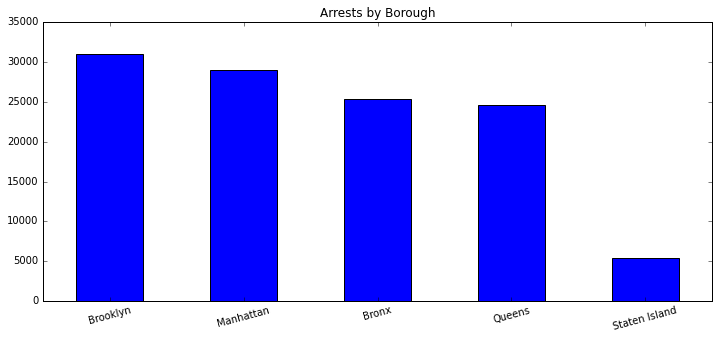

In [ ]:
# Draw the bar chart showing number of Arrests by Borough
srBoroughs.plot.bar(rot=15, title="Arrests by Borough", figsize=[12,5]);
plot.show(block=True);

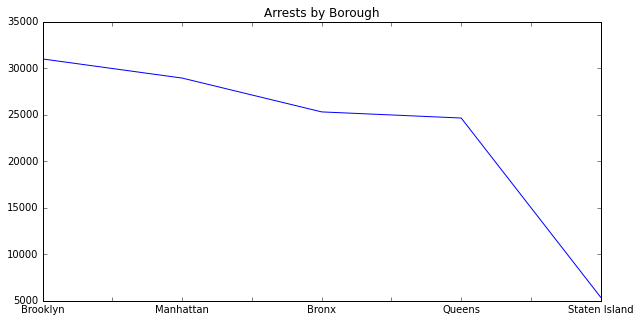

In [ ]:
srBoroughs.plot(title="Arrests by Borough",figsize=[10,5])
plot.show()

# Top Precinct - highest number of arrests
1. Precinct 14 - Manhattan - 3,291 arrests
2. Precinct 75 - Brooklyn - 3,170 arrests
3. Precinct 40 - Bronx - 3,022 arrests

Text(0, 0.5, 'Arrest  Frequency')

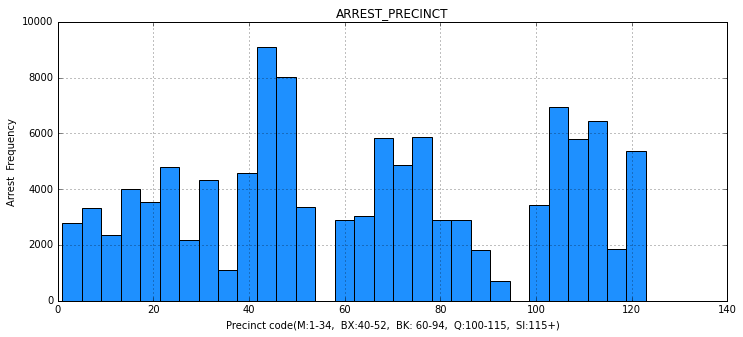

In [ ]:
#Shows Arrest by precinct- a wide spread for Brooklyn with largest #of precincts
#very concentrated high arrests for Bronx with only 12 precincts (40-52) 
df.hist(column='ARREST_PRECINCT', bins=30, figsize=[12,5],color='#1e90ff')
plot.xlabel('Precinct code(M:1-34,  BX:40-52,  BK: 60-94,  Q:100-115,  SI:115+)')
plot.ylabel('Arrest  Frequency')

# Top Jurisdiction code (0 - 2)
- 0.Patrol  = code 0 ~(91% of arrests)
- 1.Transit = code 1 ~(3% of the arrests)
- 2.Housing = code 2 ~(2.7% of the arrests)

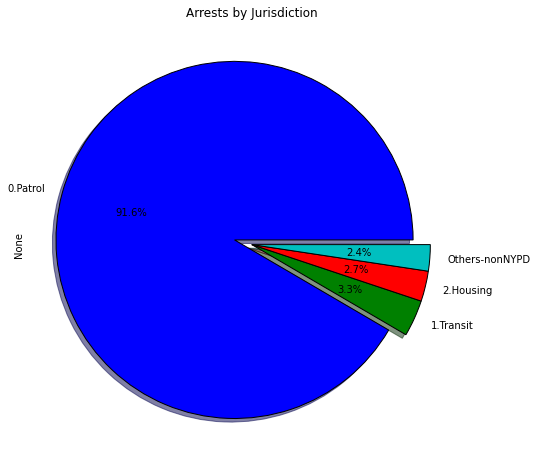

In [ ]:
#Create series with Jurisdiction values
srJuris = pd.Series([105588, 3803, 3162, 2746])
JurisCode = ['0.Patrol','1.Transit','2.Housing','Others-nonNYPD']
# set the index
srJuris.index = JurisCode
# Draw the bar chart showing number of Arrests by Borough
explode = (0.1, 0, 0, 0)
srJuris.plot.pie(figsize=[14,8],explode=explode, labels=JurisCode, autopct='%1.1f%%', title="Arrests by Jurisdiction",shadow=True);
plot.show();

In [ ]:
#Shows list of Jurisdiction codes
df[["JURISDICTION_CODE"]].value_counts(ascending=True).sort_index(ascending=True)

JURISDICTION_CODE
0                    104469
1                      3160
2                      3796
3                      1030
4                        69
6                        10
7                        83
8                         1
9                         1
11                      185
12                        1
13                       10
14                       89
15                      262
16                        2
69                        3
71                      125
72                      189
73                      141
74                        3
76                        1
85                        8
87                       22
88                        8
97                      492
dtype: int64

# Top Arrest code - KY = 344  (Assault)

In [ ]:
#Shows that Arrest code - KY_CD = 344 is the mode, which is equivalent to assault
df_KY = df.loc[:,['KY_CD']]
df_KY.mode()

,KY_CD
0,344.0


Text(0, 0.5, 'Arrest  Frequency')

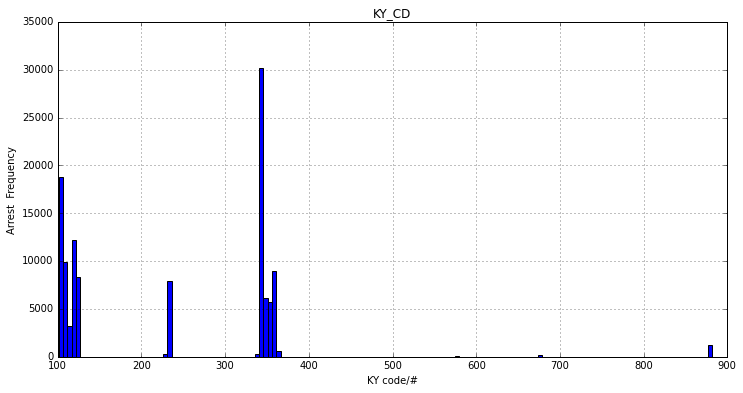

In [ ]:
#Shows the TOP arrest code lies between 340 to 350
df_KY.hist(bins=150, figsize=[12,6])
plot.xlabel('KY code/#')
plot.ylabel('Arrest  Frequency')

# **Gender** 
- Male arrest is 5 times more probable than female

In [ ]:
#shows that males are arrested 5 times more than females
df_gender = df[["GENDER"]].value_counts()
df_gender

GENDER
1         94826
2         19334
dtype: int64

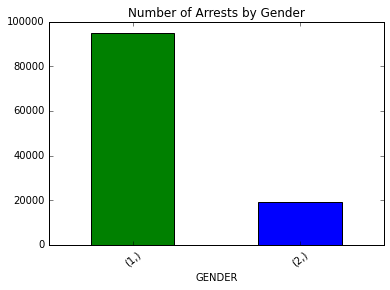

In [ ]:
# Draw a vertical bar chart showing total Arrests by gender (1 = Male, 2 = Female)
df_gender.plot.bar(x="GENDER", rot=40, color=['green', 'blue'],title="Number of Arrests by Gender");

**Mean** age group 25 - 44

In [ ]:
#Shows the age group 25-44 has 3 times the arrests that the other age groups have 
df_age = df[["AGE_GROUP"]].value_counts().sort_index(ascending=True)
df_age

AGE_GROUP
1             3408
2            21774
3            65109
4            22214
5             1655
dtype: int64

Text(0, 0.5, 'Frequency')

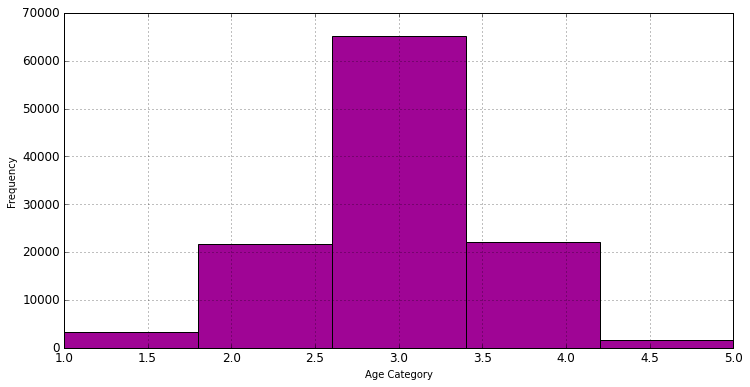

In [ ]:
#Histogram showing mean age of arrest (category 3 = '25-44'), in this age group you are 3-5 times as likely to be arrested
#in comparison to the other age groups
df['AGE_GROUP'].hist(bins=5, figsize=[12,6], color='#9f0595', xlabelsize=12,ylabelsize=12,grid=True)
plot.xlabel('Age Category')
plot.ylabel('Frequency')

**Younger persons** - 'Less than 18' years old

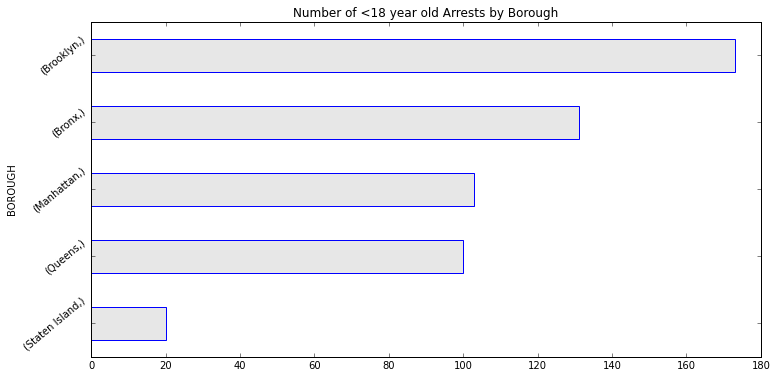

In [ ]:
#Assault (KY_CD=344) is also the number 1 arrest for pers <18 years
#Shows persons <18 years old  arrested for Assault by Borough
dfYouth=df[(df.AGE_GROUP==1) & ((df.KY_CD==344.0))]
dfYouth[["BOROUGH"]].value_counts(ascending=True).plot.barh(x="Arrests", rot=40, title="Number of <18 year old Arrests by Borough",figsize=[12,6],color=(0.1, 0.1, 0.1, 0.1), edgecolor='blue')

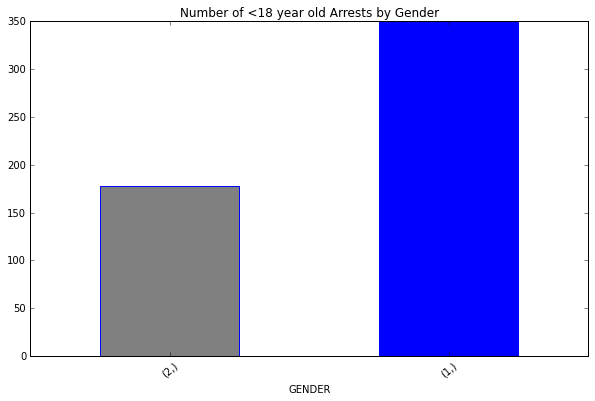

In [ ]:
#Shows number of <18 year olds arrested for Assault by Gender
dfYouth[["GENDER"]].value_counts(ascending=True).plot.bar(x="Arrests", rot=40, title="Number of <18 year old Arrests by Gender",figsize=[10,6],color=['grey', 'blue'], edgecolor='blue')

# Insights

**Precincts/ Boroughs**

- Brooklyn having the largest number of precincts (34) accounted for the highest number of arrests, Bronx per capita showed strong competition with Brooklyn as Bronx only has 12 precincts to Brooklyn's 34 precincts. It is safe to surmise that an increase# of precincts shows an increase number of arrests albeit not significantly. 

- The top 3 precincts showed arrests in excess of 3,000 (namely precincts 14(Manhattan), 75(Brooklyn), 40(Bronx). #1 being **Precinct#14.**

- The probability of arrest is 5 - 6 times higher or likley in Brooklyn/ Bronx compared to Staten Island. This outcome is even greater for males compared to females.


**Jurisdiction**

- 91% of arrests are made by NYPD officers on **Patrol**. It would be interesting to know the actual timestamp to determine the time of day most arrests take place on Patrol. 

**Arrest Code (KY_CD-344)** 
- #1 Arrest code is Assault
This arrest is 1.5 times more likely outcome than murder/ manslaughter.

**Gender/ Age**
- The probability of males being arrested is 5 times that of females - approx. 95,000 males: 19,000 females.  The mean age group arrested is 25-44, this is almost consistent across Boroughs and gender.

**Younger persons** 
- The dataset shows that the likelihood of arrests of persons less than 18 years is similar to older counterparts especially for the number 1 arrest (Assault). The trend is similar across Boroughs despite the younger age group, even though the scale is significantly greater in older age group. Also, the 'less than 18' sample age group male to female arrests is approx 2:1 unlike the 5:1 for the population data. 

**Conclusion**
- It is safe to note that safety will be a huge concern for prospective home buyers in the Boroughs that have a high number of arrests for any crime category compared to Staten Island. Prices of homes may be impacted by the significant arrests for various offenses.  The arrests trend for younger persons especially males is similar to older age group across the same Boroughs. This data could be used to help to create interventions targeting the younger age group to prevent/ reduce repeat offenses.
